# Early Stage Diabetes Risk Prediction

**Data Description**
<br> This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient.
- Data Set Characteristics:  	Multivariate	
- Number of Instances:	520	
- Area:	Computer
- Attribute Characteristics:	N/A	
- Number of Attributes:	17	
- Date Donated	2020-07-12
- Associated Tasks:	Classification	
- Missing Values?	Yes	
- Number of Web Hits:	71266

**Data Set Information:**
This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.


**Attribute Information:**
- Age 1.20-65
- Sex 1. Male, 2.Female
- Polyuria 1.Yes, 2.No.
- Polydipsia 1.Yes, 2.No.
- sudden weight loss 1.Yes, 2.No.
- weakness 1.Yes, 2.No.
- Polyphagia 1.Yes, 2.No.
- Genital thrush 1.Yes, 2.No.
- visual blurring 1.Yes, 2.No.
- Itching 1.Yes, 2.No.
- Irritability 1.Yes, 2.No.
- delayed healing 1.Yes, 2.No.
- partial paresis 1.Yes, 2.No.
- muscle sti
- ness 1.Yes, 2.No.
- Alopecia 1.Yes, 2.No.
- Obesity 1.Yes, 2.No.
- Class 1.Positive, 2.Negative.


# Research Questions

Questions we need to answer at the end of project:
1.	Finding the correlation between the class( target) variable and feature variables 
2.	Predicting the early-stage diabetics risk by considering the feature attributes using the classification learning algorithms 
3.	Evaluating the best machine learning model by considering the performance factors like accuracy, precision and recall values


# Importing Basic Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Loading Dataset

In [2]:
#importing the dataset
data=pd.read_csv(r'diabetes_data_upload.csv')

# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [135]:
pd.concat([data.head(),data.tail()],axis=0)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [6]:
list(data)

['Age',
 'Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [7]:
# Checking Missing values
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
# Let's check for unique values of all columns.
data.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

### Categorical Data Count

In [45]:
data['Polyuria'].value_counts()
percent100 = data['Polyuria'].value_counts(normalize=True).mul(100).round(1).astype(str) 
Polyuria=pd.DataFrame({'counts': data['Polyuria'].value_counts(), 'per100': percent100}).head(5)

print('------Polyuria------\n', Polyuria)

data['Gender'].value_counts()
percent100 = data['Gender'].value_counts(normalize=True).mul(100).round(1).astype(str) 
Gender=pd.DataFrame({'counts': data['Gender'].value_counts(), 'per100': percent100}).head(5)
print('\n--------Gender--------\n', Gender)

data['Polydipsia'].value_counts()
percent100 = data['Polydipsia'].value_counts(normalize=True).mul(100).round(1).astype(str) 
Polydipsia=pd.DataFrame({'counts': data['Polydipsia'].value_counts(), 'per100': percent100}).head(5)
print('\n-----Polydipsia-----\n', Polydipsia)

data['sudden weight loss'].value_counts()
percent100 = data['sudden weight loss'].value_counts(normalize=True).mul(100).round(1).astype(str) 
suddenweightloss=pd.DataFrame({'counts': data['sudden weight loss'].value_counts(), 'per100': percent100}).head(5)
print('\n---suddenweightloss---\n', suddenweightloss)

data['weakness'].value_counts()
percent100 = data['weakness'].value_counts(normalize=True).mul(100).round(1).astype(str) 
weakness=pd.DataFrame({'counts': data['weakness'].value_counts(), 'per100': percent100}).head(5)
print('\n------weakness------\n', weakness)

data['Polyphagia'].value_counts()
percent100 = data['Polyphagia'].value_counts(normalize=True).mul(100).round(1).astype(str) 
Polyphagia=pd.DataFrame({'counts': data['Polyphagia'].value_counts(), 'per100': percent100}).head(5)
print('\n------Polyphagia------\n', Polyphagia)

data['Genital thrush'].value_counts()
percent100 = data['Genital thrush'].value_counts(normalize=True).mul(100).round(1).astype(str) 
GenitalThrush=pd.DataFrame({'counts': data['Genital thrush'].value_counts(), 'per100': percent100}).head(5)
print('\n------GenitalThrush------\n', GenitalThrush)

data['visual blurring'].value_counts()
percent100 = data['visual blurring'].value_counts(normalize=True).mul(100).round(1).astype(str) 
visualBlurring=pd.DataFrame({'counts': data['visual blurring'].value_counts(), 'per100': percent100}).head(5)
print('\n------visualBlurring------\n', visualBlurring)

data['Irritability'].value_counts()
percent100 = data['Irritability'].value_counts(normalize=True).mul(100).round(1).astype(str) 
Irritability=pd.DataFrame({'counts': data['Irritability'].value_counts(), 'per100': percent100}).head(5)
print('\n------Irritability------\n', Irritability)

data['delayed healing'].value_counts()
percent100 = data['delayed healing'].value_counts(normalize=True).mul(100).round(1).astype(str) 
delayedHealing=pd.DataFrame({'counts': data['delayed healing'].value_counts(), 'per100': percent100}).head(5)
print('\n------delayedHealing------\n', delayedHealing)

data['partial paresis'].value_counts()
percent100 = data['partial paresis'].value_counts(normalize=True).mul(100).round(1).astype(str) 
partialParesis=pd.DataFrame({'counts': data['partial paresis'].value_counts(), 'per100': percent100}).head(5)
print('\n------partialParesis------\n', partialParesis)

data['muscle stiffness'].value_counts()
percent100 = data['muscle stiffness'].value_counts(normalize=True).mul(100).round(1).astype(str) 
musclestiffness=pd.DataFrame({'counts': data['muscle stiffness'].value_counts(), 'per100': percent100}).head(5)
print('\n------musclestiffness------\n', musclestiffness)

data['class'].value_counts()
percent100 = data['class'].value_counts(normalize=True).mul(100).round(1).astype(str) 
classX=pd.DataFrame({'counts': data['class'].value_counts(), 'per100': percent100}).head(5)
print('\n------classX------\n', classX)

------Polyuria------
      counts per100
No      262   50.4
Yes     258   49.6

--------Gender--------
         counts per100
Male       328   63.1
Female     192   36.9

-----Polydipsia-----
      counts per100
No      287   55.2
Yes     233   44.8

---suddenweightloss---
      counts per100
No      303   58.3
Yes     217   41.7

------weakness------
      counts per100
Yes     305   58.7
No      215   41.3

------Polyphagia------
      counts per100
No      283   54.4
Yes     237   45.6

------GenitalThrush------
      counts per100
No      404   77.7
Yes     116   22.3

------visualBlurring------
      counts per100
No      287   55.2
Yes     233   44.8

------Irritability------
      counts per100
No      394   75.8
Yes     126   24.2

------delayedHealing------
      counts per100
No      281   54.0
Yes     239   46.0

------partialParesis------
      counts per100
No      296   56.9
Yes     224   43.1

------musclestiffness------
      counts per100
No      325   62.5
Yes     195

### Outliers in Age

In [136]:
column_='Age'
np.percentile(data[column_], 50)
q75, q25 = np.percentile(data[column_], [75 ,25])
iqr = q75 - q25
data[column_][data[column_]>1.5*iqr+q75]

101    85
102    90
185    85
186    90
Name: Age, dtype: int64

# Data Preprocessing
### Binary conversion

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
lenc=LabelEncoder()
for c in data.columns[1:] :
    data[c] = lenc.fit_transform(data[c].astype(str))  
    
pd.concat([data.head(),data.tail()],axis=0)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature selection

In [14]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [15]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int32

In [18]:
# Statistical Summary of the Data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
Gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
Polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
Polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden weight loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
Polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
Genital thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
Itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


### Corelation Analysis

#### Performing Correlation Analysis to Answer RQ1:
##### RQ1: Finding the correlation between the class( target) variable and feature variables

In [19]:
data.corr()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
Polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


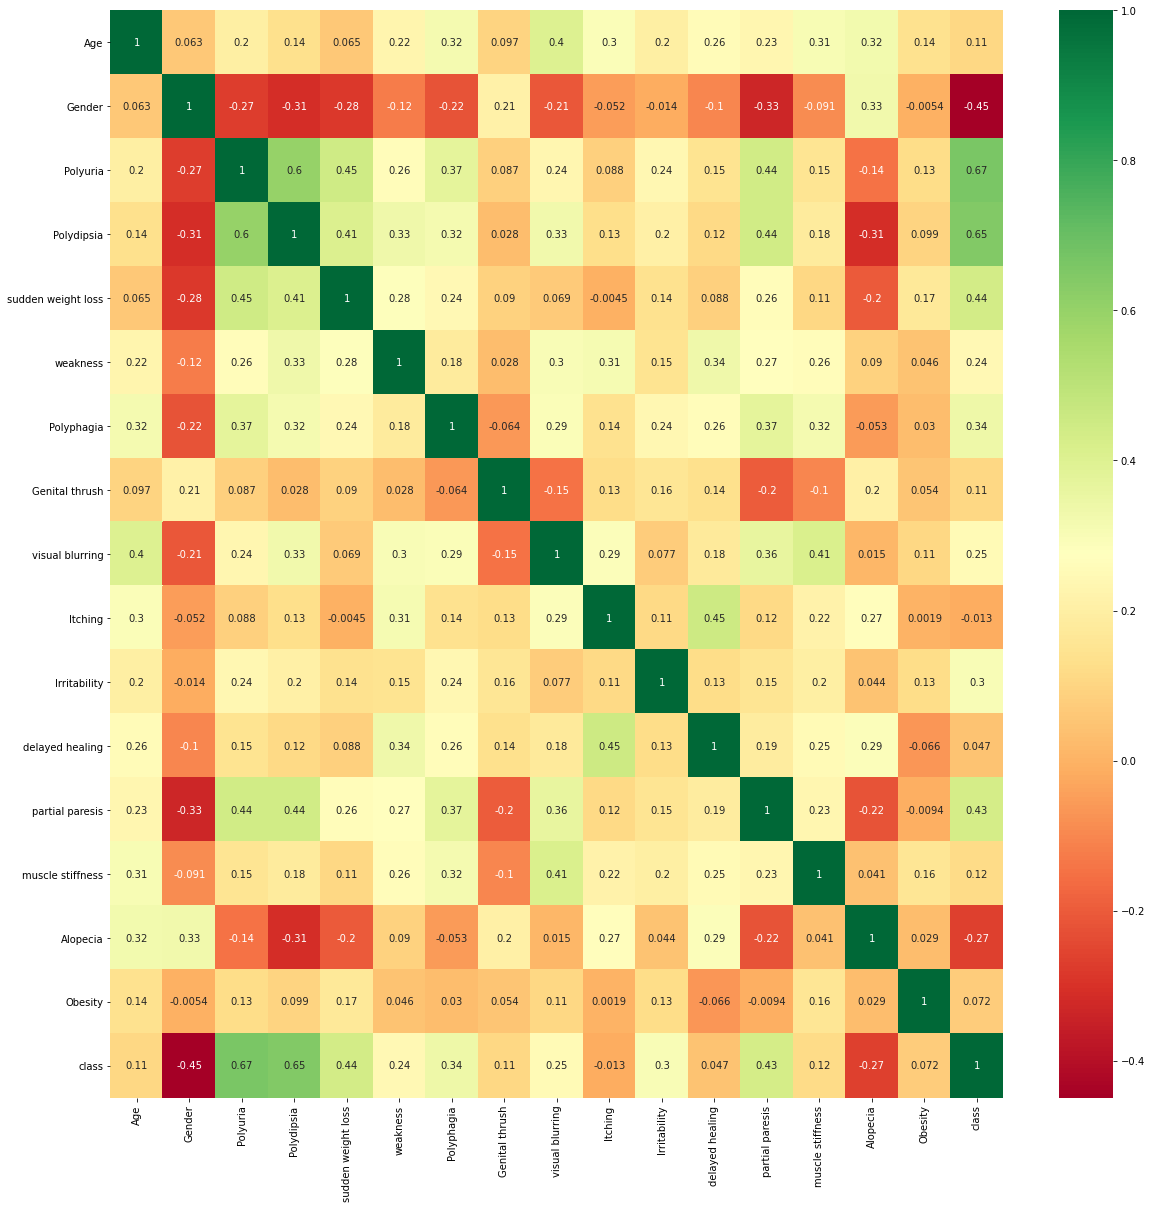

In [20]:
#get correlations of each features in dataset
# corrmat = data.corr(method='pearson') methods={‘pearson’, ‘kendall’, ‘spearman’} 

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [140]:
#Finding correlation by using X and Y functions
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

#### Visualizations for Highly Correlated

In [57]:
# Correlation with output variable
cor_target = abs(corrmat["class"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Gender                0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
Polyphagia            0.342504
partial paresis       0.432288
class                 1.000000
Name: class, dtype: float64

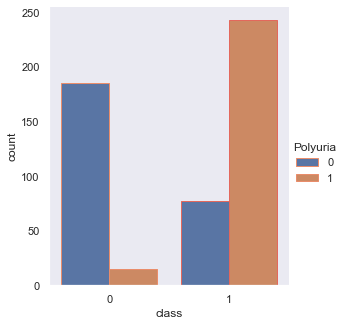

In [58]:
#Plotting the "Polyuria" Vs Class distribution
sns.set_theme(style="dark",color_codes='g')
sns.catplot(hue="Polyuria", x="class",
                data=data, kind="count",
                height=4.5, aspect=.9,edgecolor=sns.color_palette("flare"));

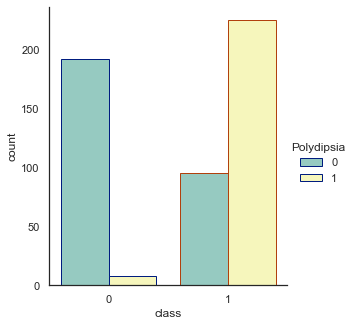

In [59]:
#Plotting the Polydipsia Vs Class distribution
sns.set_theme(style="white")
sns.catplot(hue="Polydipsia", x="class",
                data=data, kind="count",
                height=4.5, aspect=.9,palette= "Set3",edgecolor=sns.color_palette("dark",6));


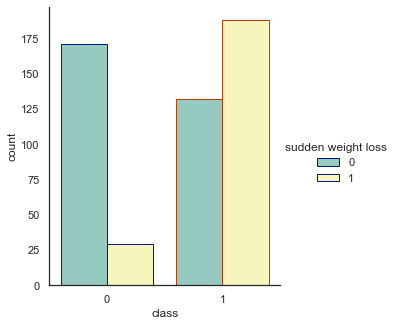

In [60]:
#Plotting the sudden weight loss Vs Class distribution
sns.set_theme(style="white")
sns.catplot(hue="sudden weight loss", x="class",
                data=data, kind="count",
                height=4.5, aspect=.9,palette= "Set3",edgecolor=sns.color_palette("dark",6));


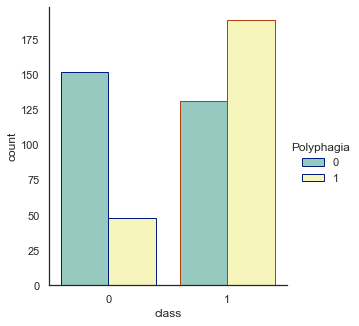

In [61]:
#Plotting the Polyphagia Vs Class distribution
sns.set_theme(style="white")
sns.catplot(hue="Polyphagia", x="class",
                data=data, kind="count",
                height=4.5, aspect=.9,palette= "Set3",edgecolor=sns.color_palette("dark",6));


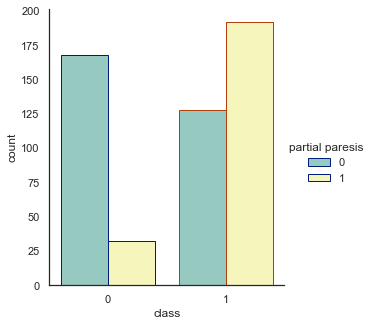

In [62]:
#Plotting the partial paresis Vs Class distribution
sns.set_theme(style="white")
sns.catplot(hue="partial paresis", x="class",
                data=data, kind="count",
                height=4.5, aspect=.9,palette= "Set3",edgecolor=sns.color_palette("dark",6));


<AxesSubplot:xlabel='Age', ylabel='class'>

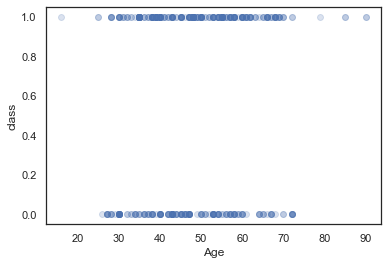

In [63]:
sns.regplot(x = "Age", y="class",
            data=data, fit_reg = False,
            scatter_kws={"alpha": 0.2})

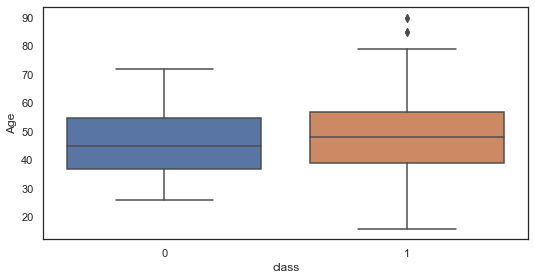

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(8.7, 4.27)

ax = sns.boxplot(x="class", y="Age", data=data)

# Feature Selection

There are various feature extraction techniques in data science which are categorized into 2 parts: 
1. Wrapper methods
2. Embedded methods

We have implemented few of the above techniques to verify importance of features and selecting them based on the accuracy of various algorithms.

#### 1. Wrapper Method- Recursive Feature Elimination Method

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

RFE attempts to eliminate dependencies and collinearity that may exist in the model.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [23]:
### use a baseline classifier logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
lr_model = log_reg.fit(X, y)

In [24]:
# Implement RFE on base model
from sklearn.feature_selection import RFE

rfe = RFE(estimator=lr_model, step=1)
### fit the rfe function for ranking
rfe = rfe.fit(X, y)

In [25]:
rfe.support_

array([False,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False,  True, False, False, False])

In [26]:
rfe.ranking_

array([9, 1, 1, 1, 1, 4, 2, 1, 6, 1, 1, 3, 1, 5, 7, 8])

**Important Features:**
- 'Gender',
- 'Polyuria',
- 'Polydipsia',
- 'sudden weight loss',
- 'Genital thrush',
- 'Itching',
- 'Irritability',
- 'partial paresis',
- 'Polyphagia',
- 'delayed healing',
- 'weakness'

#### 2. Embedded Method- Decision Tree Regressor (CART)

In [27]:
from sklearn.tree import DecisionTreeRegressor

# Create model first then fit the data with all features
cart_model = DecisionTreeRegressor()
cart_tree = cart_model.fit(X, y)
imp_feature = cart_tree.feature_importances_

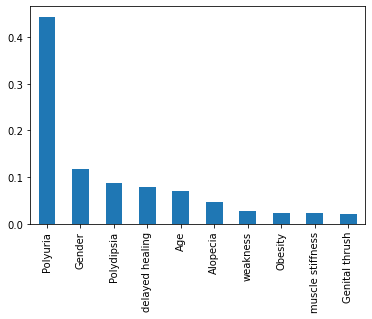

In [29]:
# Now Check the important features with higher score value
# check summary
feature_val = pd.Series(imp_feature, index = X.columns)

# draw chart of important feature
feature_val.nlargest(10).plot(kind='bar')
plt.show()

**Important Features:**
- 'Polyuria',
- 'Gender',
- 'Polydipsia',
- 'Alopecia',
- 'Age',
- 'delayed healing',
- 'muscle stiffness',
- 'weakness',
- 'Obesity',
- 'Genital thrush',

#### Selected Features

After analyzing the two results of two feature selection methods, we concluded that below are the important features based on their occurrences and comparison in each method:

**Important Features:**

- 'Polyuria',
- 'Gender',
- 'Polydipsia',
- 'Genital thrush',
- 'weakness'
- 'delayed healing'

### Train Test Split

In [141]:
# splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [142]:
#Normailizing data
#Scalling the data as Age is not a binary
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
225,0.175676,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
94,0.270270,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0
462,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
284,0.756757,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0
23,0.432432,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0


In [143]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(364, 16)

(156, 16)

(364,)

(156,)

# Building Classification Model

#### Applying Different Classification Algorithms to Answer RQ2:
##### RQ2: Predicting the early-stage diabetics risk by considering the feature attributes using the classification learning algorithms

# ITERATION - 01 : Building Model with ALL Attributes

### 1. Decision Tree Classification Algorithm

In [98]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10)}

# creating a model
DT_all = GridSearchCV(DecisionTreeClassifier(), param_grid)

# feeding the training data into the model
DT_all.fit(X_train, y_train)

DT_all.best_params_

{'max_depth': 6}

In [101]:
DT_1 = DecisionTreeClassifier(max_depth=6)
DT_1 = DT_1.fit(X_train, y_train)

In [104]:
# predicting the values for x-test
y_pred = DT_1.predict(X_test)

#### Performance Measure - Decision Tree

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

# finding the training and testing accuracy
print("Training Accuracy: ",DT_1.score(X_train, y_train))
print("Testing Accuracy: ", DT_1.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Training Accuracy:  0.9835164835164835
Testing Accuracy:  0.9487179487179487

Confusion Matrix of DT on Training Dataset - 
 [[52  2]
 [ 6 96]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.98      0.94      0.96       102

    accuracy                           0.95       156
   macro avg       0.94      0.95      0.94       156
weighted avg       0.95      0.95      0.95       156

Accuracy: 0.948718
precision: 0.979592
recall: 0.941176
f1: 0.960000
ROC AUC: 0.952070


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

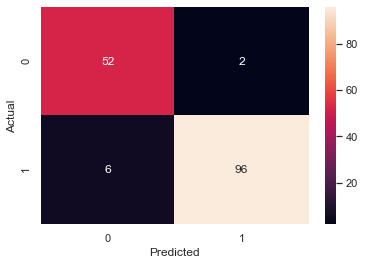

In [111]:
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

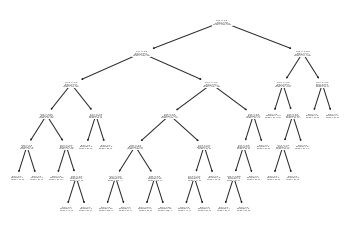

In [120]:
# Once trained, you can plot the tree with the plot_tree function:
from sklearn import tree
tree.plot_tree(DT_1) 
plt.savefig('out.pdf')

### 2. Logistic Regression Classification Algorithm

In [123]:
from sklearn.linear_model import LogisticRegression

lr_1 = LogisticRegression()
lr_1 = lr_1.fit(X_train,y_train)

In [124]:
# predicting the values for x-test
y_pred = lr_1.predict(X_test)

#### Performance Measure - Logistic Regression

In [126]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

# finding the training and testing accuracy
print("Training Accuracy: ",lr_1.score(X_train, y_train))
print("Testing Accuracy: ", lr_1.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Training Accuracy:  0.9340659340659341
Testing Accuracy:  0.9358974358974359

Confusion Matrix of DT on Training Dataset - 
 [[49  5]
 [ 5 97]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156

Accuracy: 0.935897
precision: 0.950980
recall: 0.950980
f1: 0.950980
ROC AUC: 0.929194


# ITERATION - 02 : Building Model with SELECTED Attributes

**Important Features:**

- 'Polyuria',
- 'Gender',
- 'Polydipsia',
- 'Genital thrush',
- 'weakness'
- 'delayed healing'

Dropping the columns/features which are not required.

In [144]:
##### Dropping not required columns 
X_train.drop(['Age', 'sudden weight loss',  'Polyphagia',  'visual blurring', 'Itching', 'Irritability', 'partial paresis', 'muscle stiffness',  'Alopecia', 'Obesity'], 1 , inplace = True)
X_test.drop(['Age', 'sudden weight loss',  'Polyphagia',  'visual blurring', 'Itching', 'Irritability', 'partial paresis', 'muscle stiffness',  'Alopecia', 'Obesity'], 1 , inplace = True)

In [148]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(364, 6)

(156, 6)

(364,)

(156,)

### 3. Decision Tree Classification Algorithm

In [149]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10)}

# creating a model
DT_all = GridSearchCV(DecisionTreeClassifier(), param_grid)

# feeding the training data into the model
DT_all.fit(X_train, y_train)

DT_all.best_params_

{'max_depth': 6}

In [150]:
DT_2 = DecisionTreeClassifier(max_depth=6)
DT_2 = DT_2.fit(X_train, y_train)

In [151]:
# predicting the values for x-test
y_pred = DT_2.predict(X_test)

#### Performance Measure - Decision Tree

In [152]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

# finding the training and testing accuracy
print("Training Accuracy: ",DT_2.score(X_train, y_train))
print("Testing Accuracy: ", DT_2.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Training Accuracy:  0.9258241758241759
Testing Accuracy:  0.9102564102564102

Confusion Matrix of DT on Training Dataset - 
 [[46  8]
 [ 6 96]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.92      0.94      0.93       102

    accuracy                           0.91       156
   macro avg       0.90      0.90      0.90       156
weighted avg       0.91      0.91      0.91       156

Accuracy: 0.910256
precision: 0.923077
recall: 0.941176
f1: 0.932039
ROC AUC: 0.896514


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

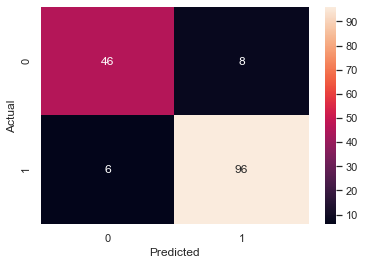

In [153]:
cm = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(cm, annot=True)

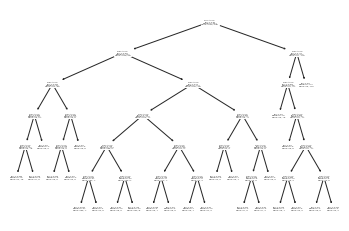

In [154]:
# Once trained, you can plot the tree with the plot_tree function:
from sklearn import tree
tree.plot_tree(DT_2) 
plt.savefig('out.pdf')

### 4. Logistic Regression Classification Algorithm

In [155]:
from sklearn.linear_model import LogisticRegression

lr_2 = LogisticRegression()
lr_2 = lr_2.fit(X_train,y_train)

In [156]:
# predicting the values for x-test
y_pred = lr_2.predict(X_test)

#### Performance Measure - Logistic Regression

In [157]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score                        

# finding the training and testing accuracy
print("Training Accuracy: ",lr_2.score(X_train, y_train))
print("Testing Accuracy: ", lr_2.score(X_test, y_test))

# Calculating the confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

# printing the confusion Matrix
print("\nConfusion Matrix of DT on Training Dataset - \n", cm)
print("\nClassification Report of DT on Training Dataset - \n", cr)

# accuracy = (tp+tn) / (p+n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision = (tp) / (tp+fp)
precision = precision_score(y_test, y_pred)
print('precision: %f' % precision)

# recall = (tp) / (tp+fn)
recall = recall_score(y_test, y_pred)
print('recall: %f' % recall)

# f1 = 2 (tp) / (2tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('f1: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Training Accuracy:  0.9093406593406593
Testing Accuracy:  0.9294871794871795

Confusion Matrix of DT on Training Dataset - 
 [[48  6]
 [ 5 97]]

Classification Report of DT on Training Dataset - 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.94      0.95      0.95       102

    accuracy                           0.93       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.93      0.93      0.93       156

Accuracy: 0.929487
precision: 0.941748
recall: 0.950980
f1: 0.946341
ROC AUC: 0.919935


# Evaluating Classification Model

#### Evaluating Classification Algorithms to Answer RQ3:
##### RQ3: Evaluating the best machine learning model by considering the performance factors like accuracy, precision and recall values

## Performance Measure with ALL attributes

**Decision Tree (DT_1)**
- Training Accuracy:  98.35
- Testing Accuracy:  94.87
- precision: 97.95
- recall: 94.12
- f1: 96
- ROC AUC: 95.2

**Logistic Regression (LR_1)**
- Training Accuracy: 93.4
- Testing Accuracy: 93.58
- precision: 95.09
- recall: 95.09
- f1: 95.09
- ROC AUC: 92.91

## Performance Measure with SELECTED attributes

**Decision Tree (DT_2)**
- Training Accuracy:  92.58
- Testing Accuracy:  91.02
- precision: 92.3
- recall: 94.11
- f1: 93.2
- ROC AUC: 89.65

**Logistic Regression (LR_2)**
- Training Accuracy: 90.93
- Testing Accuracy: 92.94
- precision: 94.17
- recall: 95.09
- f1: 94.63
- ROC AUC: 91.99

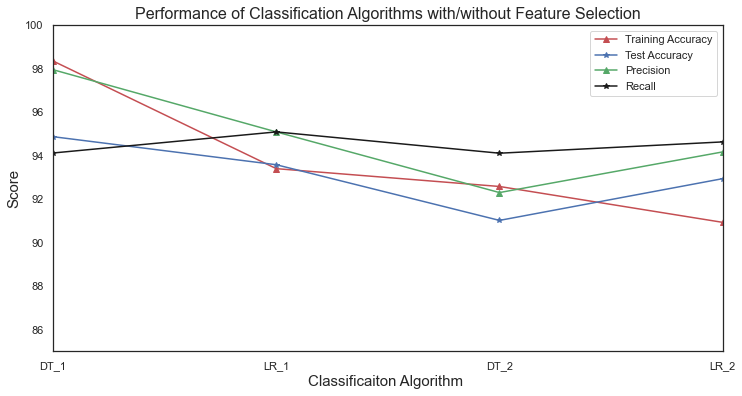

In [189]:
#  plotting the graph for performance of decision trees with different max_depth values

Model = np.array(['DT_1', 'LR_1', 'DT_2', 'LR_2'])

Training_Accuracy = np.array([98.35, 93.4, 92.58, 90.93])
Testing_Accuracy = np.array([94.87, 93.58, 91.02, 92.94])
Precision = np.array([97.95, 95.09, 92.3, 94.17])
Recall = np.array([94.12, 95.09, 94.11, 94.63])

plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(Model, Training_Accuracy, 'r-^', label="Training Accuracy")
plt.plot(Model, Testing_Accuracy, 'b-*', label = "Test Accuracy")
plt.plot(Model, Precision, 'g-^', label = "Precision")
plt.plot(Model, Recall, 'k-*', label = "Recall")

plt.title('Performance of Classification Algorithms with/without Feature Selection', fontsize = 16)
plt.xlim([0, 3])
plt.ylim([85, 100])
plt.xlabel('Classificaiton Algorithm ', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()

plt.show()